In [1]:
import pandas as pd
import numpy as np
import datetime
import json
from matplotlib import pyplot as plt
import os
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import matplotlib.colors as colrs
import json
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colrs
from shapely.geometry import shape as Shape
import numpy as np
from descartes.patch import PolygonPatch
import shutil
from shapely.geometry.polygon import Polygon
import geopandas as gpd
from sklearn.cluster import KMeans
from matplotlib.legend import Legend
import seaborn as sns

In [2]:
city_dims = {
    'Bordeaux': (334, 342),
    'Clermont-Ferrand': (208, 268),
    'Dijon': (195, 234),
    'Grenoble': (409, 251),
    'Lille': (330, 342),
    'Lyon': (426, 287),
    'Mans': (228, 246),
    'Marseille': (211, 210),
    'Metz': (226, 269),
    'Montpellier': (334, 327),
    'Nancy': (151, 165),
    'Nantes': (277, 425),
    'Nice': (150, 214),
    'Orleans': (282, 256),
    'Paris': (409, 346),
    'Rennes': (423, 370),
    'Saint-Etienne': (305, 501),
    'Strasbourg': (296, 258),
    'Toulouse': (280, 347),
    'Tours': (251, 270)
    }

In [3]:
city_str = 'Marseille'
app_str = 'Youtube' 

In [4]:
path =  f'./dataset/{city_str}/{app_str}/'

In [5]:
days = [
    d for d in os.listdir(path)
    if os.path.isdir(os.path.join(path, d)) and not d.startswith('.')
]

In [6]:
day = "20190317"

In [7]:
date = datetime.datetime.strptime(day, '%Y%m%d')
times = [date + datetime.timedelta(minutes=15*i) for i in range(96)]
times_str = [t.strftime('%H:%M') for t in times]
columns = ['tile_id'] + times_str

# Now i want to group all days in one dataframe

In [8]:
list_of_days_means = []

In [9]:
def fillna_with_row_mean(row):
    mean_value = row.mean()
    return row.fillna(mean_value)

In [10]:
dictionary_days = dict()

In [11]:
#get mean traffic of each day
for day in days:
    df_traffic_day = f'./dataset/{city_str}/{app_str}/{day}/{city_str}_{app_str}_{day}_DL.txt'
    df_day_means = pd.read_csv(df_traffic_day, sep=' ', names=columns)

    df_day = df_day_means.copy()
    tiles = df_day_means['tile_id']
    
    df_day_means.drop('tile_id',axis= 1, inplace = True)
    #check for null values
    if df_day_means.isna().any().any():
        print(df_traffic_day)
        df_day_means = df_day_means.apply(fillna_with_row_mean, axis=1)

    df_day['tile_id'] = tiles
    dictionary_days[day] = df_day
        
    df_day_means = df_day_means.mean()
    df_day_means['day'] = day
    list_of_days_means.append(df_day_means)

./dataset/Marseille/Youtube/20190331/Marseille_Youtube_20190331_DL.txt


In [12]:
df = pd.concat(list_of_days_means, axis=1).transpose()

# save all days in as csv files in folder

In [13]:
os.mkdir(path+'/all_days_in_csv')

In [14]:
for d_f in dictionary_days:
    dictionary_days[d_f].to_csv(path+'/all_days_in_csv/'+d_f+'.csv', index=False) 

# removing outliers

In [15]:
df.set_index('day',inplace = True)

In [16]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)
df_after_rm_outliers = df[~outliers]

In [17]:
df_outliers = df[outliers]

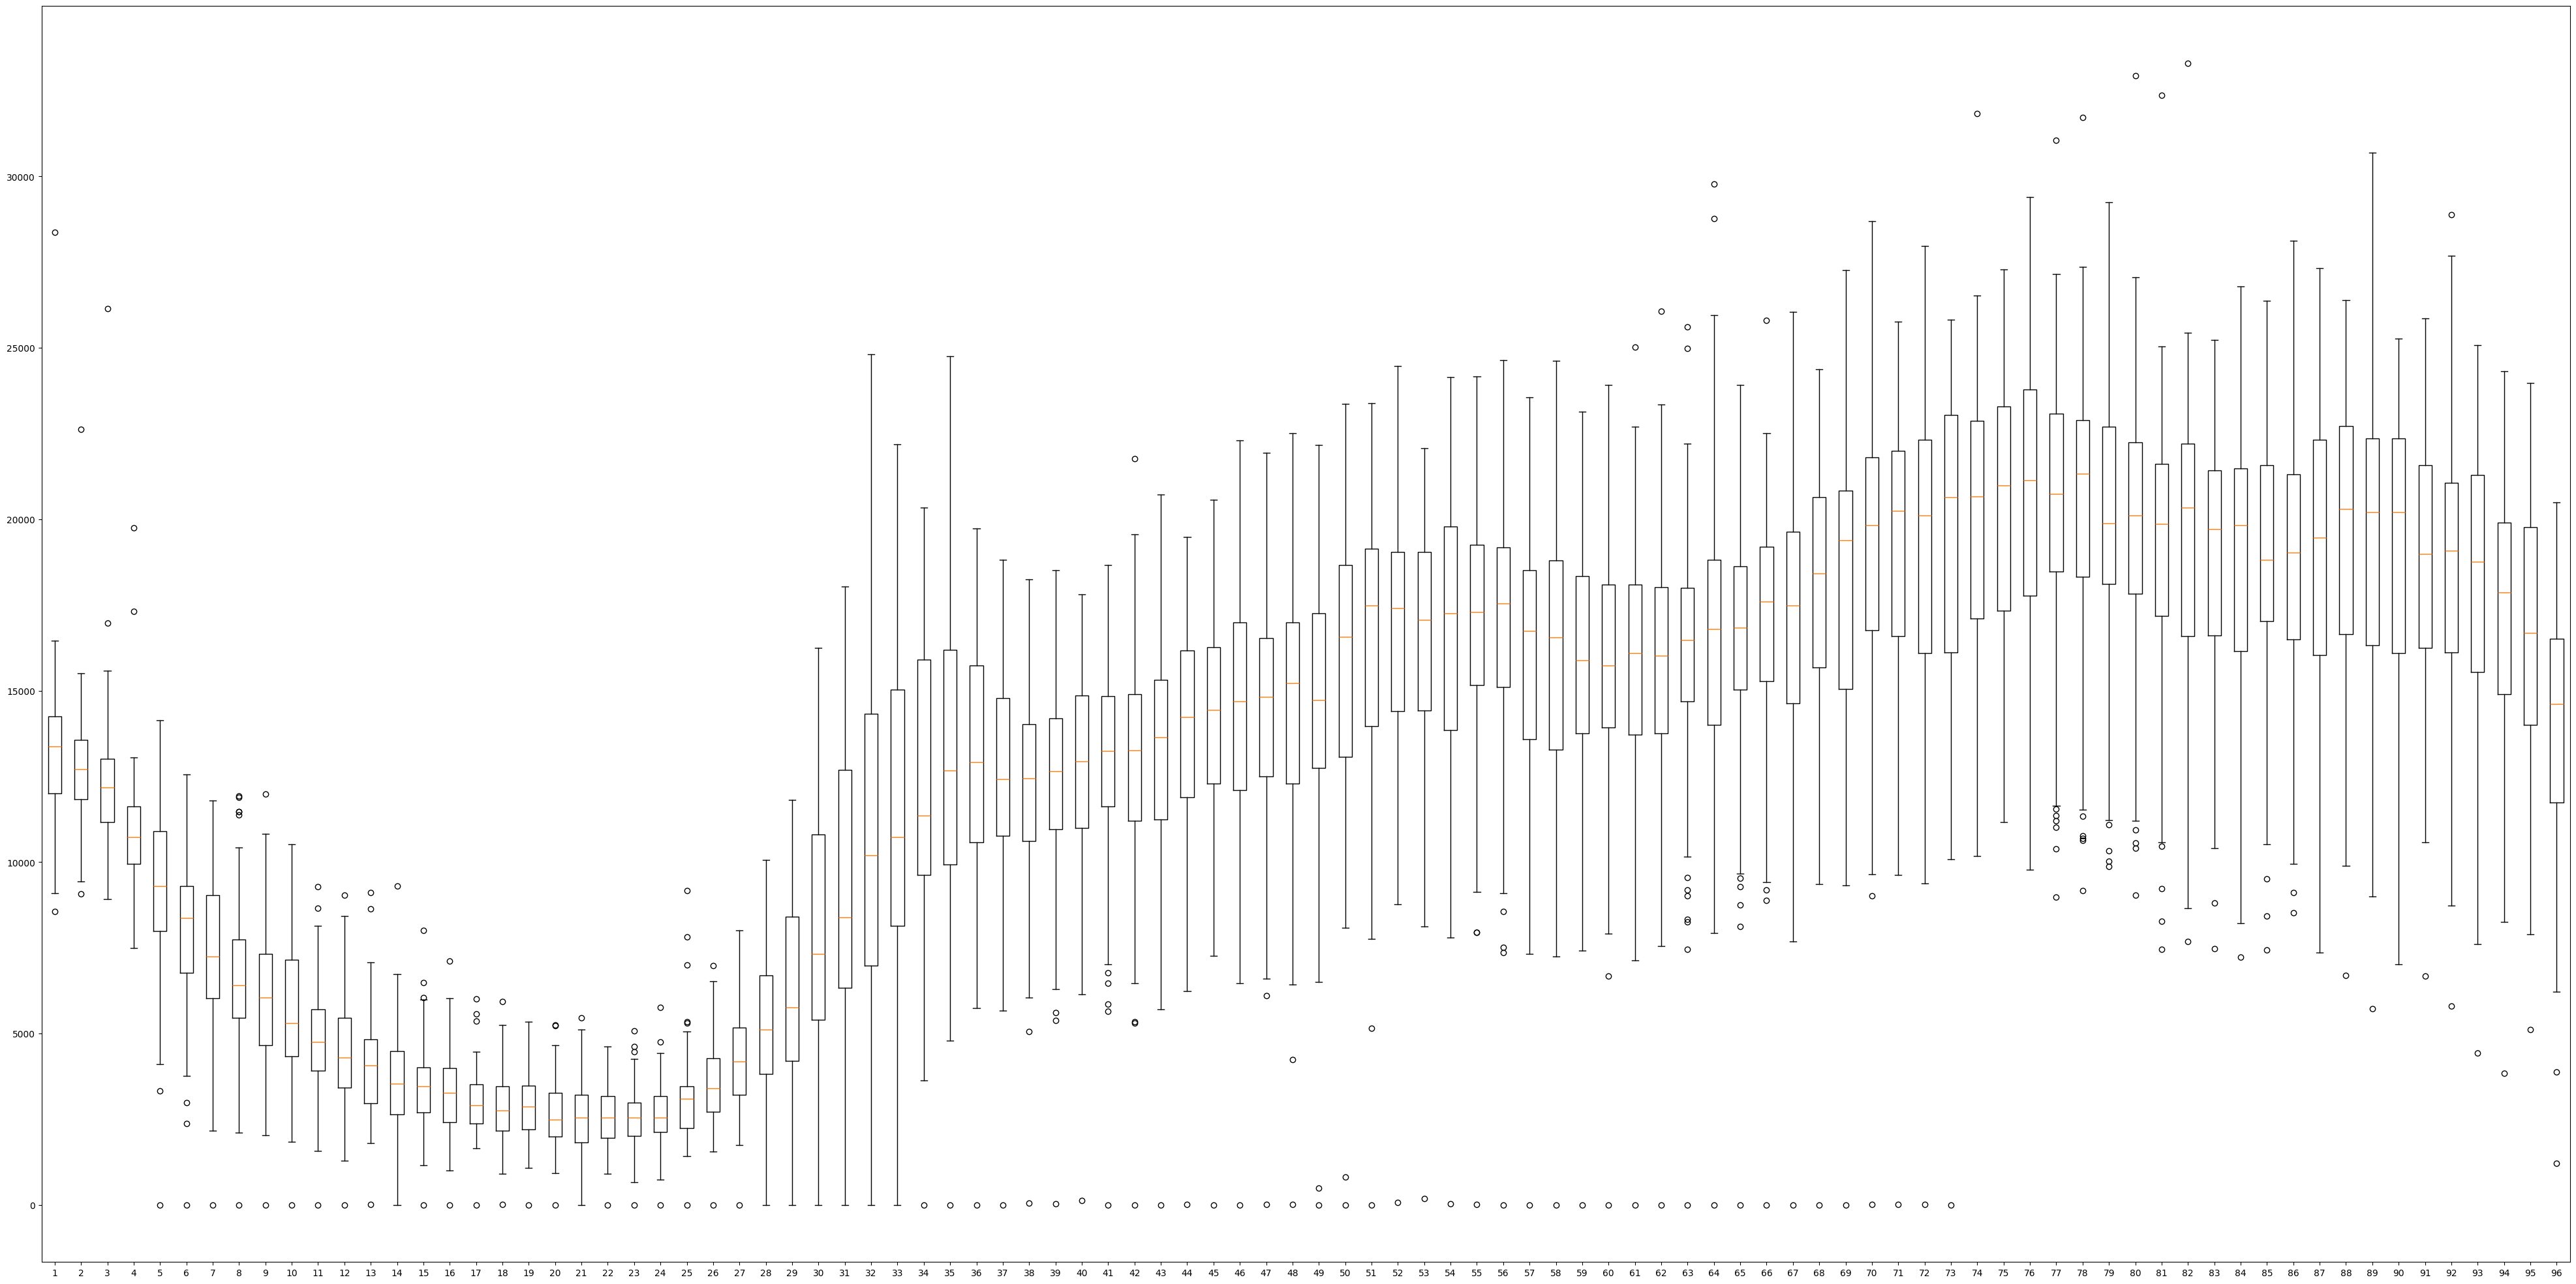

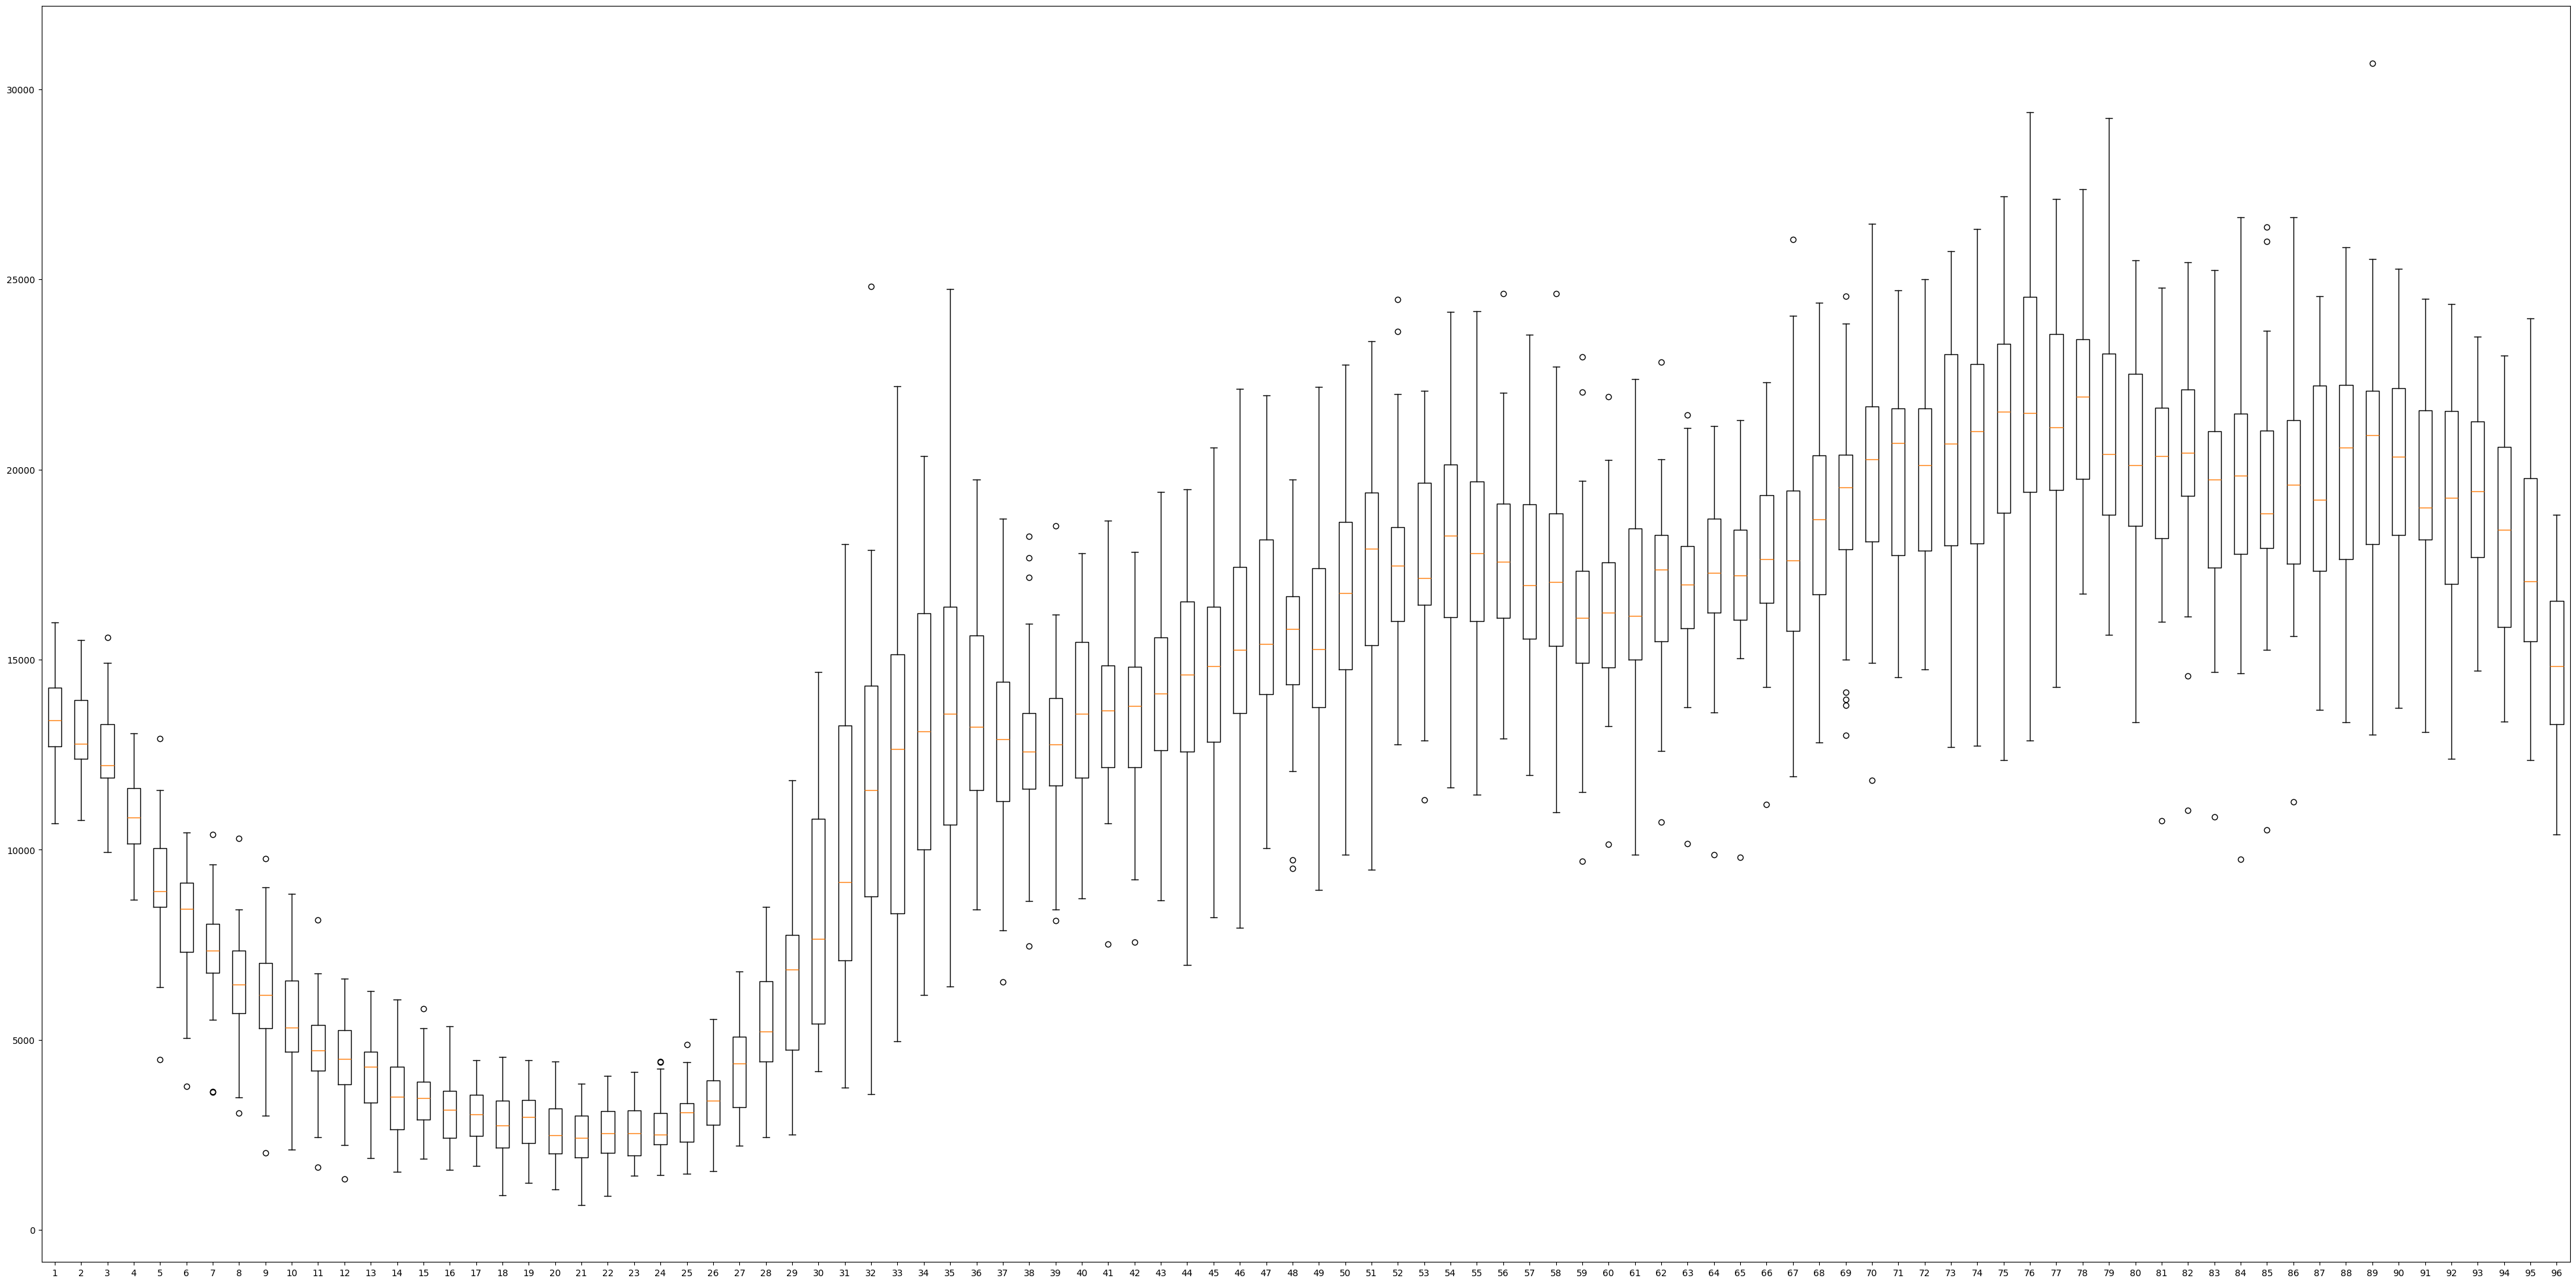

In [18]:
fig1 = plt.figure(figsize =(50, 25))
plt.boxplot(df)
plt.show()

fig2 = plt.figure(figsize =(50, 25))
plt.boxplot(df_after_rm_outliers)
plt.show()

# ------------------------------------------------------------------------------------------

In [19]:
df_after_rm_outliers.reset_index(drop=False, inplace=True)

In [20]:
df_outliers.reset_index(drop=False, inplace=True)

In [21]:
df_outliers

,day,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,02:00,...,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45
0,20190504,11767.814943,11836.435363,11633.807252,10227.306005,6242.09462,4784.317838,4587.58695,2415.150108,2530.122047,...,11514.657736,14631.439378,12747.555678,10344.154968,10825.409204,8727.291214,10657.233318,9649.576934,10450.319993,9084.948654
1,20190503,12183.562693,12795.524786,12743.176224,10673.080632,3324.480581,2368.119892,2159.226049,2979.183409,2676.428771,...,10798.955669,11560.35452,11926.392596,14473.706462,14164.764738,14930.515066,15129.203778,11759.958754,10801.241094,10657.970291
2,20190330,13101.465114,13305.002451,13982.858598,11105.378904,10954.920889,7092.885095,6033.699066,5785.812239,5562.774923,...,20913.189959,21930.179352,22385.958585,19960.585598,16731.341419,17954.383637,23918.938765,18078.770739,15304.411951,16836.356421
3,20190502,14198.424291,13398.209906,12597.130288,11375.95457,11331.018468,8756.635169,8730.529645,3914.578963,4155.655327,...,12162.628745,12093.354266,10736.316486,11809.305963,13466.008283,12827.465072,12459.595825,11008.355534,10677.343955,8720.070109
4,20190505,11322.008706,12417.412712,12079.587119,11050.048937,7785.37472,6013.338081,5505.940329,5212.299962,4342.561045,...,13577.813168,13483.778557,13029.128302,11674.53459,12208.859612,10087.375438,9377.464311,10908.942864,10293.629633,8164.102607
5,20190331,12293.343617,15300.632295,10663.13388,9760.794574,9444.290622,8469.524194,9369.686092,8335.792672,7983.906352,...,18986.711068,21727.763217,20190.183874,20110.701179,15948.510671,16731.855682,14678.575334,14678.575334,14678.575334,14678.575334
6,20190415,12832.077716,12326.909606,12018.584076,11079.883066,9807.274183,8150.178676,7002.969277,7464.601741,6692.96615,...,20182.322318,19678.82834,18739.84761,20987.990491,17300.423826,18940.364873,17369.261125,18062.218231,14711.403288,11901.254913
7,20190423,13596.079956,11589.367916,10311.540633,8939.009424,8012.265266,6906.39137,7184.362,6005.785319,4826.398512,...,22926.537759,22683.006888,20433.3347,22543.055487,23270.844398,23160.117398,21921.505135,19772.562186,23980.12378,18091.597557
8,20190422,14722.133457,13485.576723,12957.452605,12197.227148,13264.069391,12138.168449,10666.333052,11463.788235,9162.884799,...,23777.898576,26382.795461,24590.63238,24131.711744,22562.706377,22411.928792,22456.118497,21228.035329,20041.653848,17027.561045
9,20190408,13955.414825,12775.81114,12271.923721,11216.874572,9948.512657,8202.751088,6551.162574,6675.570553,4945.649664,...,19268.418713,16738.044838,15401.831467,16055.674555,15220.575836,17481.821536,14703.731606,15695.378101,13326.198749,13274.461395


In [22]:
#dictionary to group all days by its name
dictonary_of_days = dict()

In [23]:
for day in df_after_rm_outliers['day'].tolist():
    d = datetime.datetime.strptime(day, '%Y%m%d')
    if d.strftime('%A') in dictonary_of_days:
        dictonary_of_days[d.strftime('%A')].append(day)
    else:
        dictonary_of_days[d.strftime('%A')] = []
        dictonary_of_days[d.strftime('%A')].append(day)

In [24]:
#create directory for each day_name
for day in dictonary_of_days.keys():
    path = f"./dataset/{city_str}/{app_str}/all_days_in_csv/"
    os.makedirs(path+day)

In [25]:
# group the days by its name each one in its directory
for day in dictonary_of_days.keys():
    for d in dictonary_of_days[day]:
            source = f"./dataset/{city_str}/{app_str}/all_days_in_csv/"
            source += d + ".csv"
            destination = f"./dataset/{city_str}/{app_str}/all_days_in_csv/"
            destination = destination + day
            shutil.move(source, destination)

In [26]:
os.makedirs(path+"outliers")

In [27]:
for file in df_outliers['day'].tolist():
    source = f"./dataset/{city_str}/{app_str}/all_days_in_csv/"
    destination = source + "/outliers"
    source += file+".csv"
    shutil.move(source, destination)

In [28]:
l_out= []

In [29]:
day = datetime.datetime.strptime('20190317', '%Y%m%d')
times = [day + datetime.timedelta(minutes=15*i) for i in range(96)]
times_str = [t.strftime('%H:%M') for t in times]

In [30]:
# here is grouping all of the excel values for each day under its name 
# ex: group all the saturdays in one saturday.csv file storing the av value for each hour
for day_title in dictonary_of_days.keys():
    path = f"./dataset/{city_str}/{app_str}/" + "all_days_in_csv/" + day_title +"/"
    list_of_d = []
    for curr_day in dictonary_of_days[day_title]:
        curr_path = path + "/" + f"{curr_day}.csv"
        df = pd.read_csv(curr_path)
        list_of_d.append(df)
    merged_df = pd.concat(list_of_d).groupby('tile_id').mean()
    l_out.append(merged_df)
    merged_df.to_csv(path+day_title+'.csv')

In [31]:
# makeing all dfs without indexes 
for d in l_out:
    d.reset_index(inplace = True);

# Load data of weeks

In [32]:
list_df_days = []

In [33]:
days_names = ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']

In [34]:
path_o = f'./dataset/{city_str}/{app_str}/all_days_in_csv/'

In [35]:
for day_name in days_names:
    file_path = path_o + day_name + "/" + day_name + ".csv"
    df = pd.read_csv(file_path)
    list_df_days.append(df)

In [36]:
start_time = pd.Timestamp('00:00:00')
end_time = pd.Timestamp('23:59:59')
time_intervals = pd.date_range(start=start_time, end=end_time, freq='15T')
times_str = [time.strftime('%H:%M') for time in time_intervals]

/var/folders/19/85js5jqn52q28jzy8r3bk3tr0000gn/T/ipykernel_31850/962735573.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  time_intervals = pd.date_range(start=start_time, end=end_time, freq='15T')


In [37]:
merged_df_ = pd.concat(list_df_days).groupby('tile_id').mean()
merged_df_.to_csv(path_o+"all_days.csv")

# ------------------------------------------------------------------------------------------

# Clustering tiles using average daily traffic

In [38]:
path = f'./dataset/{city_str}/{app_str}/all_days_in_csv/'

In [39]:
df = pd.read_csv(path+"all_days.csv")

In [40]:
df_places = gpd.read_file('./dataset/'+'Marseille.geojson')

In [41]:
merged_with_shapes = df_places.merge(df, on='tile_id')

In [42]:
avg_list = []

In [43]:
for index, row in merged_with_shapes.iterrows():
    avg_list.append(sum(row[2:len(row)])/96)

In [44]:
merged_with_shapes['avg_traffic'] = avg_list

In [45]:
g1 = np.percentile(avg_list, 20)
g2 = np.percentile(avg_list, 40)
g3 = np.percentile(avg_list, 60)
g4 = np.percentile(avg_list, 80)

/Users/yusifkhaled/Downloads/Netmob/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


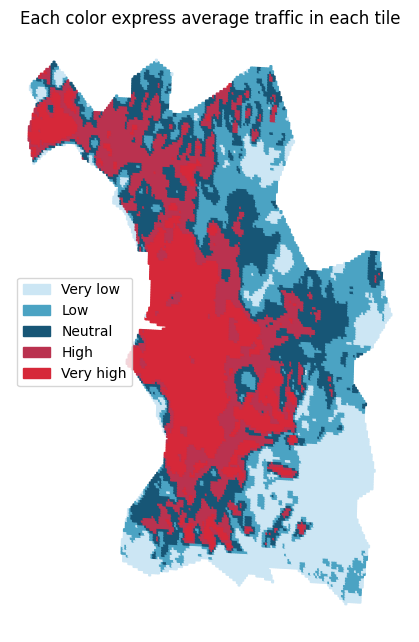

In [46]:
fig = plt.figure(figsize=(4, 6))
ax = fig.add_axes([0, 0, 1, 1])
colors = ['#CCE6F4','#4BA3C3','#175676','#BA324F','#D62839']
i = 0

plt.title('Each color express average traffic in each tile')

for index, row in merged_with_shapes.iterrows():
    coordinates = row['geometry']
    polygon = Polygon(coordinates)
    if row['avg_traffic'] > g4:
        ax.fill(*polygon.exterior.xy, color=colors[4])
    elif row['avg_traffic'] > g3:
        ax.fill(*polygon.exterior.xy, color=colors[3])
    elif row['avg_traffic'] > g2:
        ax.fill(*polygon.exterior.xy, color=colors[2])
    elif row['avg_traffic'] > g1:
        ax.fill(*polygon.exterior.xy, color=colors[1])
    else:
        ax.fill(*polygon.exterior.xy, color=colors[0])


plt.autoscale(True)
plt.axis('off')
patch1 = mpatches.Patch(color='#CCE6F4', label='Very low')
patch2 = mpatches.Patch(color='#4BA3C3', label='Low')
patch3 = mpatches.Patch(color='#175676', label='Neutral')
patch4 = mpatches.Patch(color='#BA324F', label='High')
patch5 = mpatches.Patch(color='#D62839', label='Very high')

plt.legend(handles=[patch1, patch2,patch3,patch4,patch5])

plt.show()

Fit 1 clusters
Fit 2 clusters
Fit 3 clusters
Fit 4 clusters
Fit 5 clusters
Fit 6 clusters
Fit 7 clusters
Fit 8 clusters
Fit 9 clusters
Fit 10 clusters


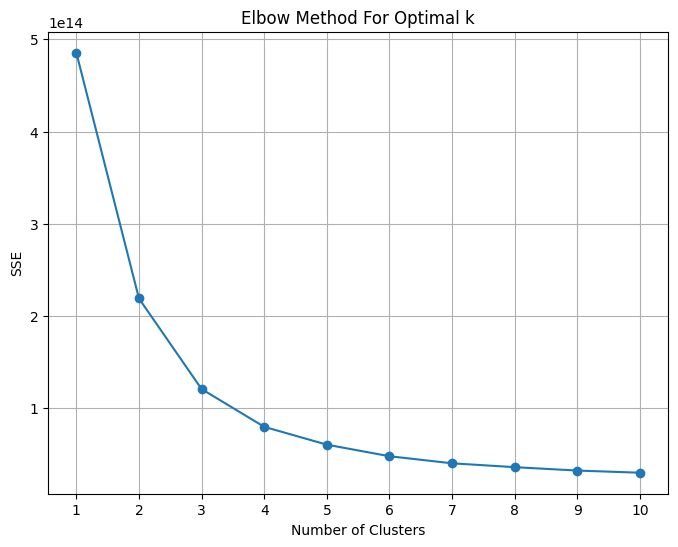

In [47]:
df_int = merged_with_shapes.select_dtypes(include='int64').dropna()
df_float = merged_with_shapes.select_dtypes(include='float64').dropna()

result = pd.merge(left=df_int, right=df_float, left_index=True, right_index=True)

def find_optimal_clusters(data, max_k):
    iters = range(1, max_k + 1)
    sse = []
    for k in iters:
        kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
        print(f'Fit {k} clusters')

    plt.figure(figsize=(8, 6))
    plt.plot(iters, sse, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('SSE')
    plt.title('Elbow Method For Optimal k')
    plt.xticks(iters)
    plt.grid(True)
    plt.show()


find_optimal_clusters(result, 10)

In [48]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0).fit(result)
merged_with_shapes['Segmentation'] = kmeans.labels_

(np.float64(5.2656050337500595),
 np.float64(5.545212168944696),
 np.float64(43.186695487388974),
 np.float64(43.39964533143781))

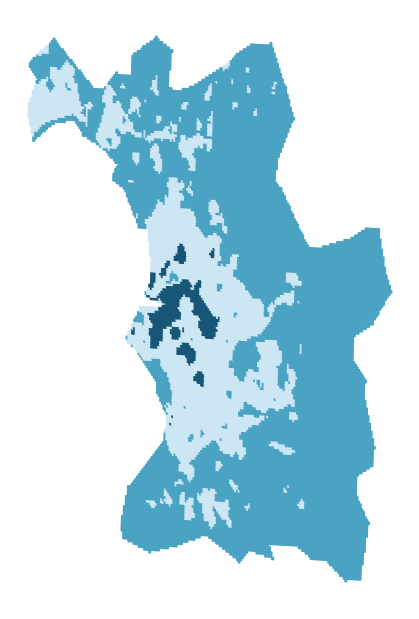

In [49]:
fig = plt.figure(figsize=(4, 6))
ax = fig.add_axes([0, 0, 1, 1])
colors = ['#CCE6F4','#4BA3C3','#175676','#BA324F','#D62839']
i = 0

for index, row in merged_with_shapes.iterrows():
    coordinates = row['geometry']
    polygon = Polygon(coordinates)
    ax.fill(*polygon.exterior.xy, color=colors[row['Segmentation']])


plt.autoscale(True)
plt.axis('off')



# Get day's average traffic per hour

In [50]:
def aggregate_columns(df, agg_func=np.sum):
    n = 4
    new_columns = []

    for i in range(0, df.shape[1], n):
        cols = df.iloc[:, i:i+n]
        new_col = cols.apply(agg_func, axis=1)
        start_time = cols.columns[0][:2]
        end_time = cols.columns[min(n-1, len(cols.columns)-1)][:2]
        new_col_name = f"{start_time}:00 - {end_time}:45"
        new_columns.append(new_col.rename(new_col_name))

    return pd.concat(new_columns, axis=1)

In [51]:
aggregated_data = {}

In [52]:
for day in days_names:
    file_path = f'./dataset/{city_str}/{app_str}/all_days_in_csv/{day}/{day}.csv'
    df = pd.read_csv(file_path)
    if 'tile_id' in df.columns:
        df.drop('tile_id', axis = 1 , inplace=True)
    
    df_aggregated = aggregate_columns(df, agg_func=np.sum)
    aggregated_data[day] = df_aggregated

In [53]:
aggregated_data_mean = {}

In [54]:
for day in days_names:
    df = aggregated_data[day]
    mean_values = df.mean(axis=0)
    mean_df = pd.DataFrame(mean_values).transpose()
    aggregated_data_mean[day] = mean_df

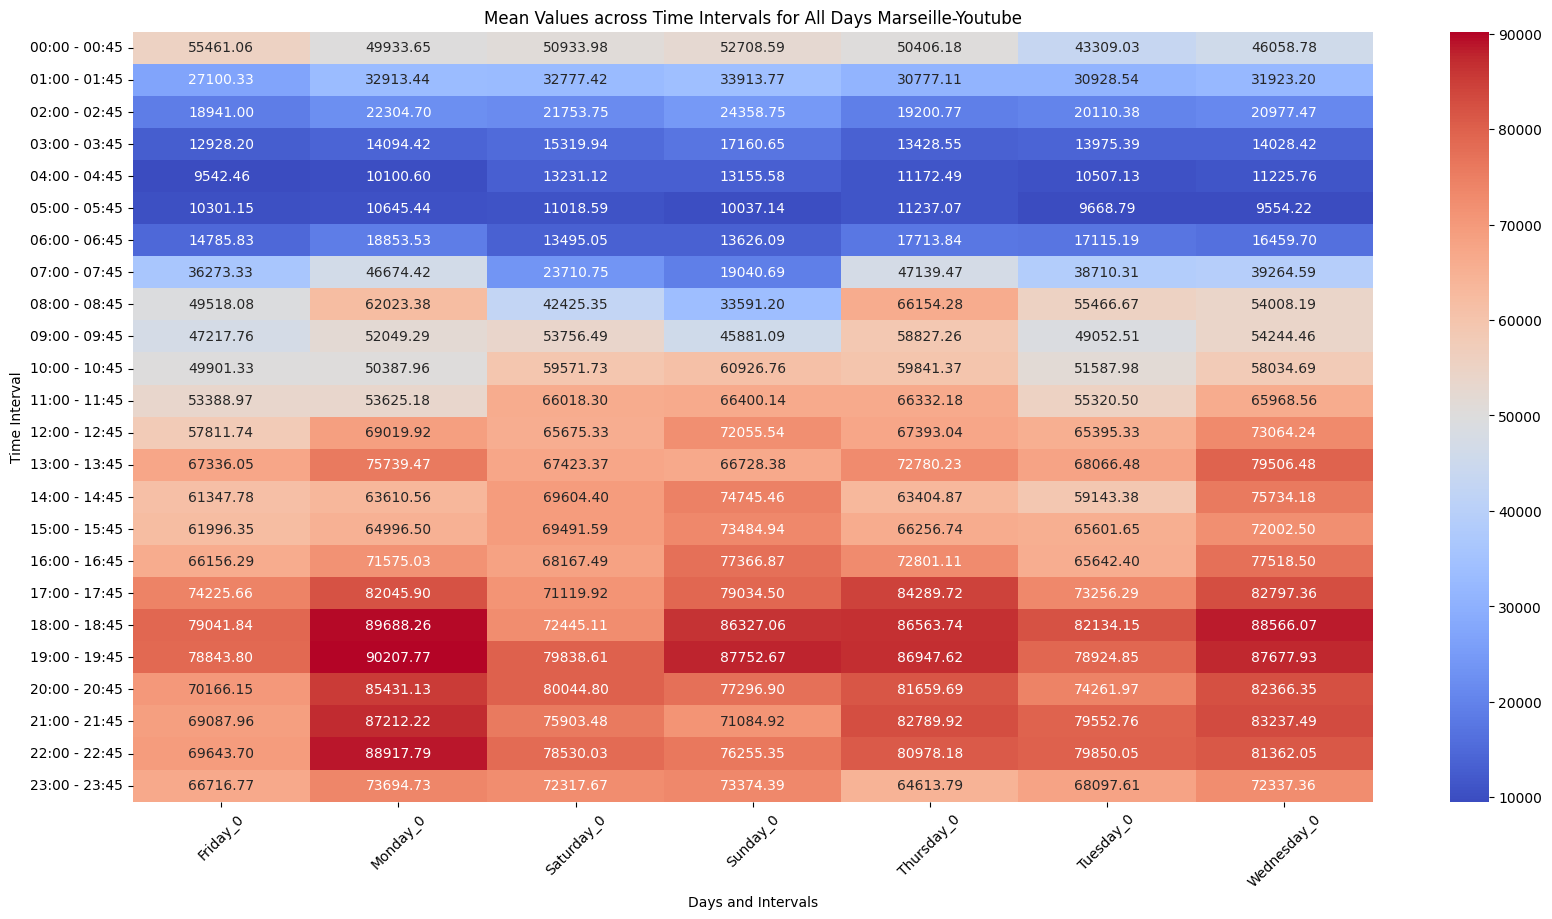

In [55]:
frames = []

for day in days_names:
    mean_df = aggregated_data_mean[day].transpose()
    mean_df.columns = [day + '_' + str(col) for col in mean_df.columns] 
    frames.append(mean_df)

combined_df = pd.concat(frames, axis=1)
plt.figure(figsize=(20, 10))
sns.heatmap(combined_df, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)
plt.title('Mean Values across Time Intervals for All Days Marseille-Youtube')
plt.ylabel('Time Interval')
plt.xlabel('Days and Intervals')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [66]:
import pandas as pd

mean_values = combined_df.mean(axis=0).to_frame(name='Mean Value')
mean_values.index.name = 'Day'

print("Mean Values Across Time Intervals for All Days - Marseille-Youtube\n")
print(mean_values)

Mean Values Across Time Intervals for All Days - Marseille-Youtube

               Mean Value
Day                      
Friday_0     50322.233620
Monday_0     56906.054222
Saturday_0   53107.260585
Sunday_0     54429.476582
Thursday_0   56779.550355
Tuesday_0    52319.972013
Wednesday_0  57413.271772


# Matrix Representation

In [57]:
# fetch the number of rows and columns of the city
n_rows, n_cols = city_dims[city_str]

# create a 3D array to store the traffic values
# the first dimension is the time, the second and third are the rows and columns (spatial dimensions)
city_traffic = np.zeros((len(times_str), n_rows, n_cols))

# fill the array with the traffic values
for _, row in df_day.iterrows():
    tile_id = row['tile_id']
    row_index = int(tile_id // n_cols)
    col_index = int(tile_id % n_cols)

    traffic_values = np.array(row[times_str])
    city_traffic[:, row_index, col_index] = traffic_values

# Traffic Map

/var/folders/19/85js5jqn52q28jzy8r3bk3tr0000gn/T/ipykernel_31850/780326874.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_traffic = cm.get_cmap('Spectral_r').copy()


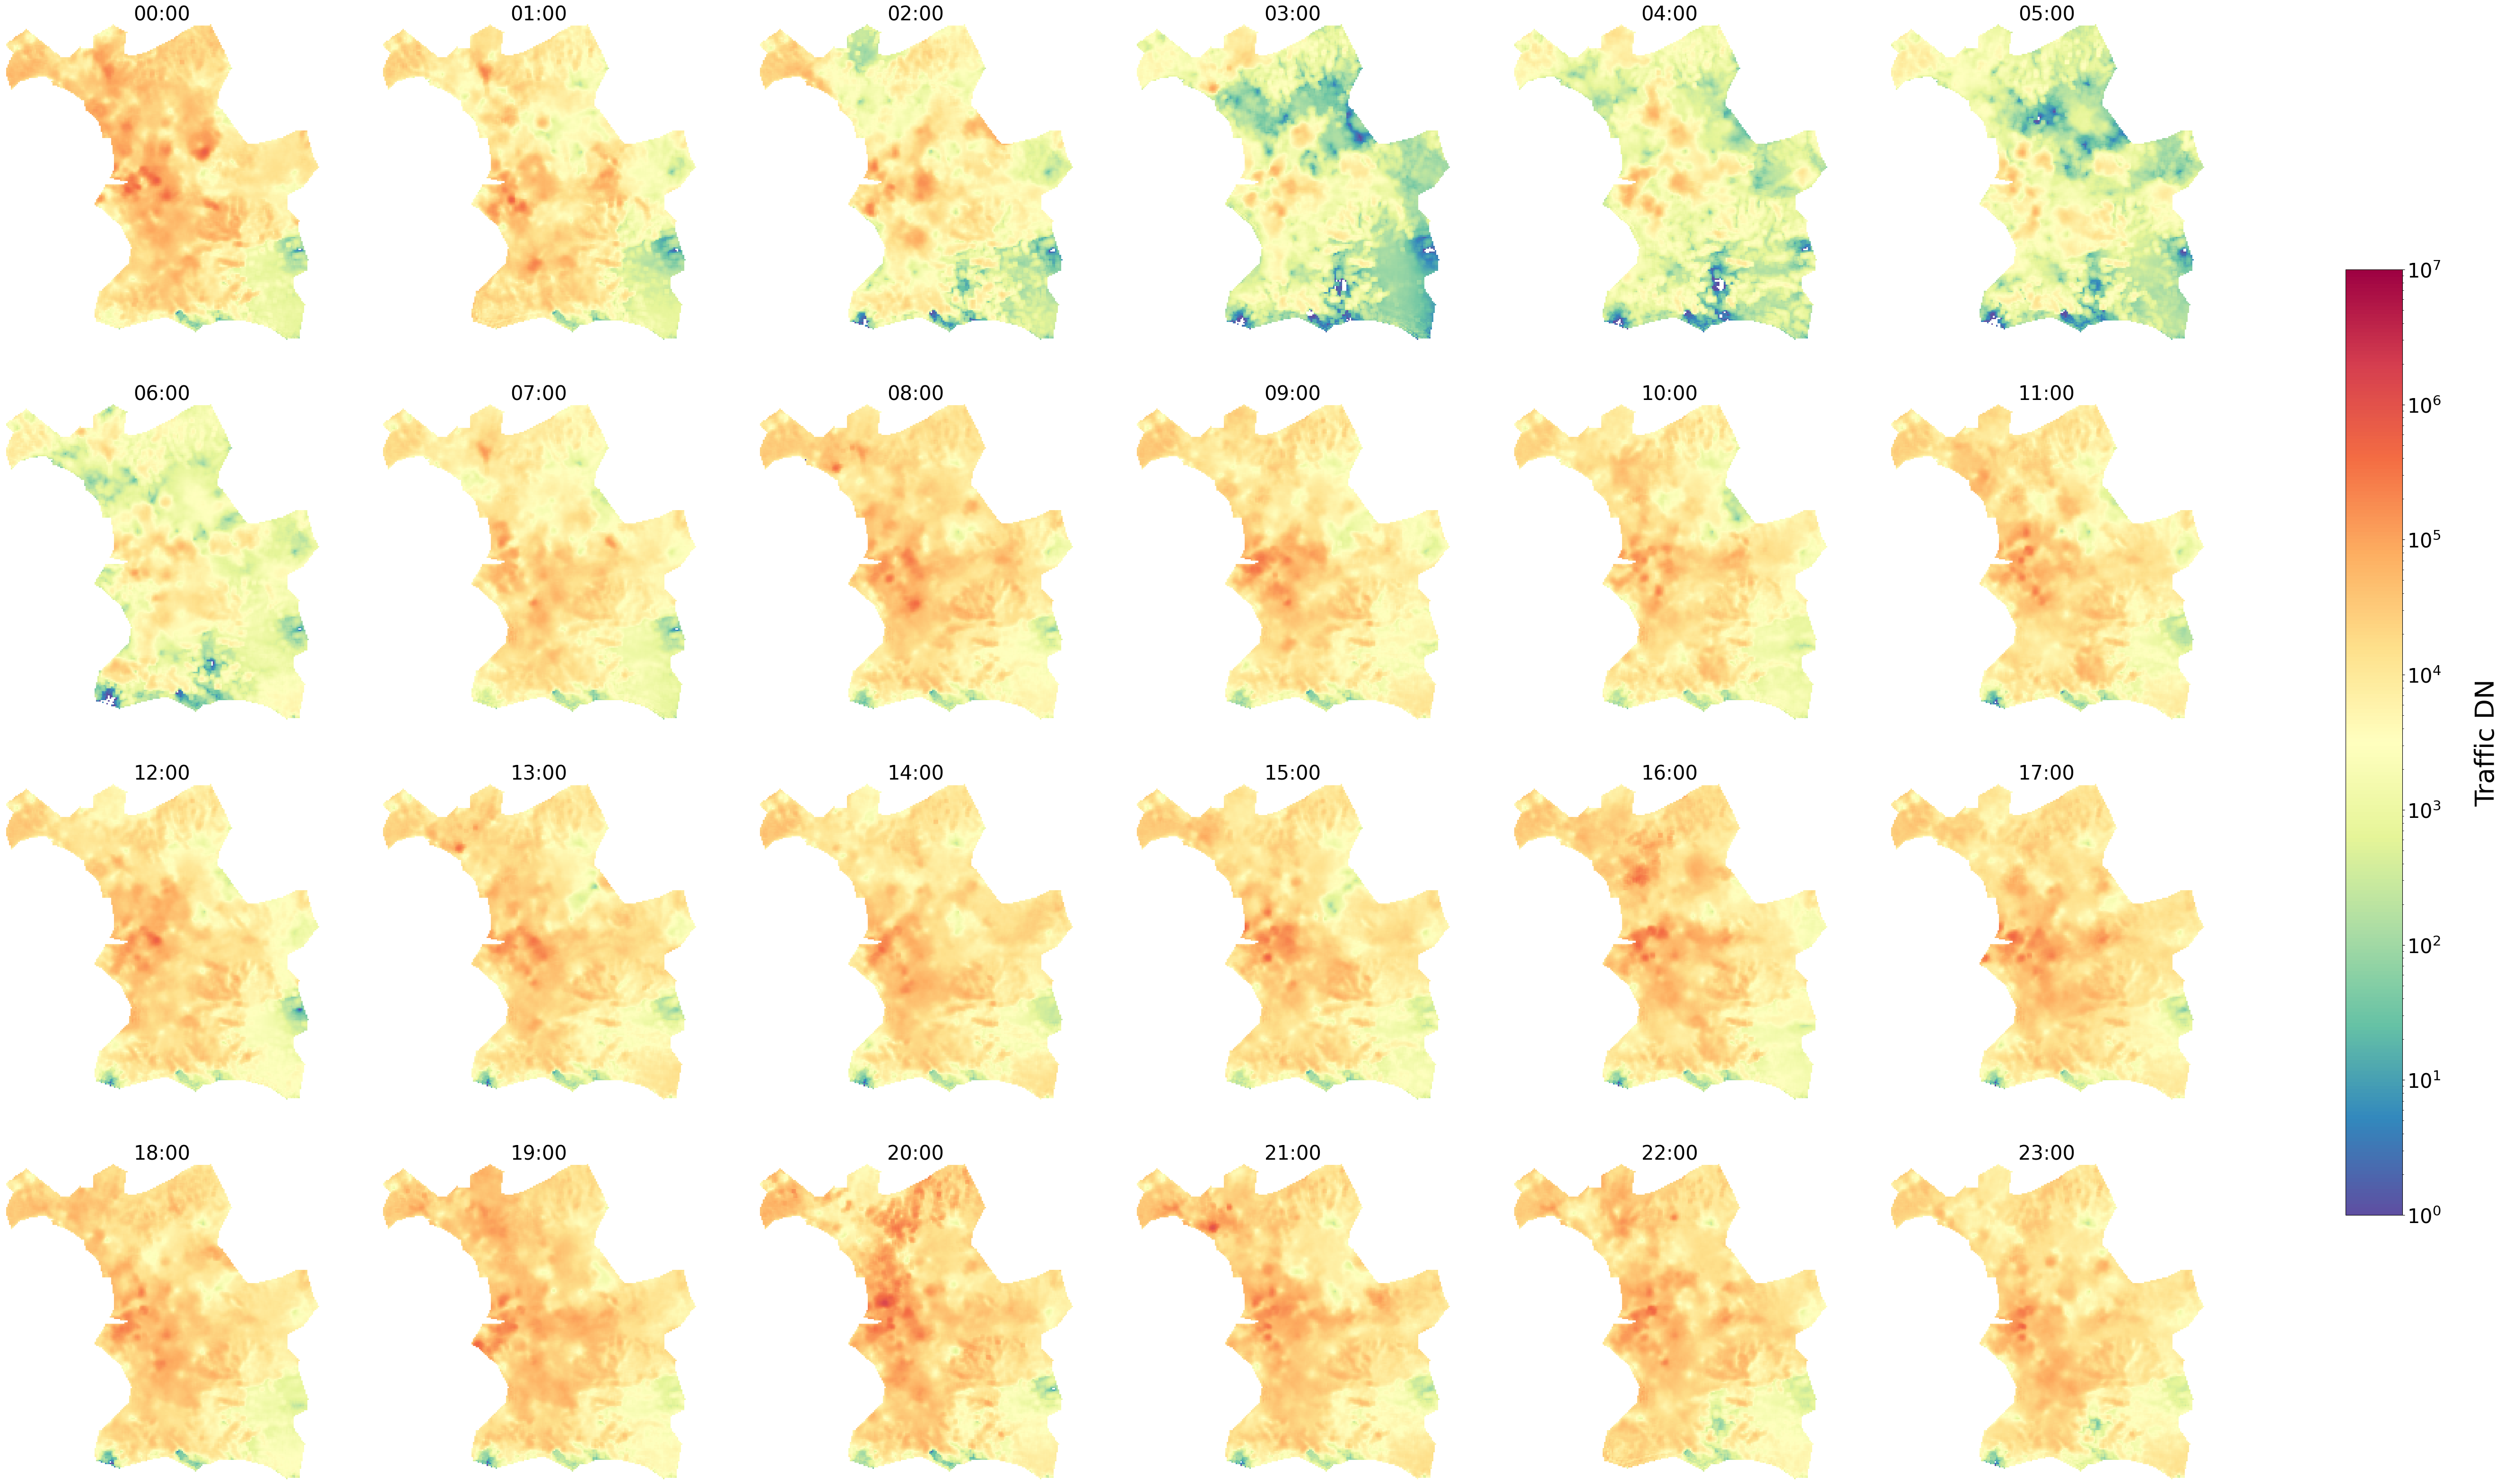

In [58]:
cmap_traffic = cm.get_cmap('Spectral_r').copy()
cmap_traffic.set_under('w', 0)
norm_traffic = colrs.LogNorm(vmin=1e0, vmax=1e7)

# let's plot the traffic map of the city for the first 15 min of each hour
fig, axs = plt.subplots(4, 6, figsize=(60, 40))
axs = axs.flatten()

for hour in range(24):
    ax = axs[hour]

    #recall that we have 15 min intervals, so we need to multiply the hour by 4
    city_traffic_time = city_traffic[ hour * 4 ] 

    ax.imshow(city_traffic_time, origin='lower', cmap=cmap_traffic, norm=norm_traffic)
    ax.set_title(f'{str(hour).zfill(2)}:00', fontsize=30)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off')

ax = fig.add_axes([0.95, 0.25, 0.02, .5])
sm = plt.cm.ScalarMappable(cmap=cmap_traffic, norm=norm_traffic)
sm.set_array([])
clb = plt.colorbar(sm, cax=ax, orientation='vertical') 
clb.set_label('Traffic DN', rotation=90, fontsize=40, labelpad=50)
clb.ax.tick_params(labelsize=30)
clb.ax.xaxis.set_ticks_position('default')

plt.show()

# Total traffic time series

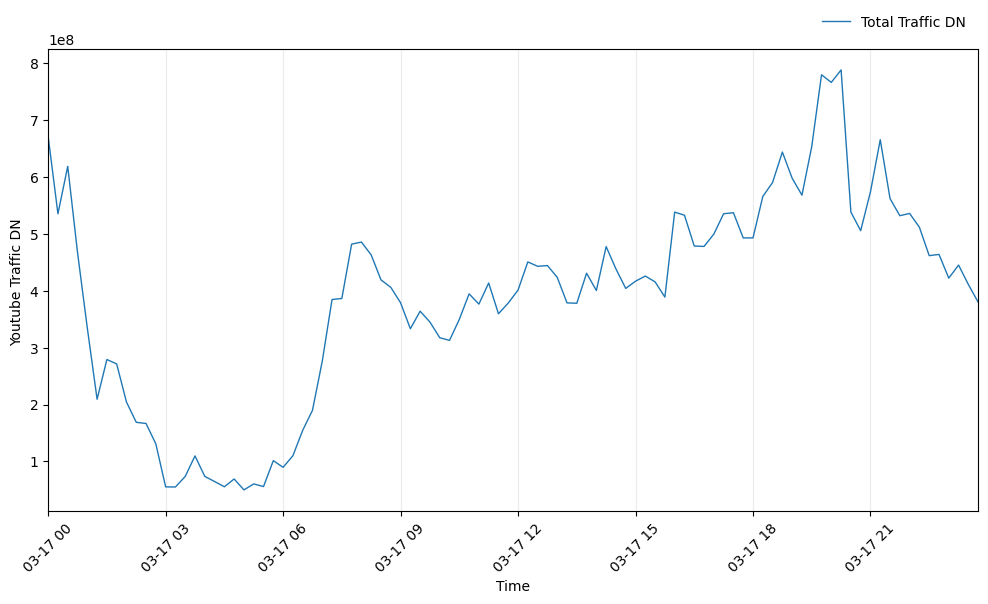

In [59]:
traffic_time_series = city_traffic.sum(axis=(1, 2))

fig = plt.figure(figsize=(12, 6))
plt.plot(times, traffic_time_series, linewidth=1, color='tab:blue', label='Total Traffic DN')
plt.xlabel('Time')
plt.ylabel(f'{app_str} Traffic DN ')
plt.xticks(rotation=45)
plt.grid(axis='x', alpha=0.25)
plt.xlim(times[0], times[-1])
plt.legend(loc='upper right',
            ncol=1,
            bbox_to_anchor=(1, 1.1), 
            fancybox=False, 
            frameon=False)
plt.show()

# Traffic time series for specific tile

Selected non-zero tiles: [(np.int64(149), np.int64(62)), (np.int64(132), np.int64(87)), (np.int64(105), np.int64(164)), (np.int64(95), np.int64(65))]


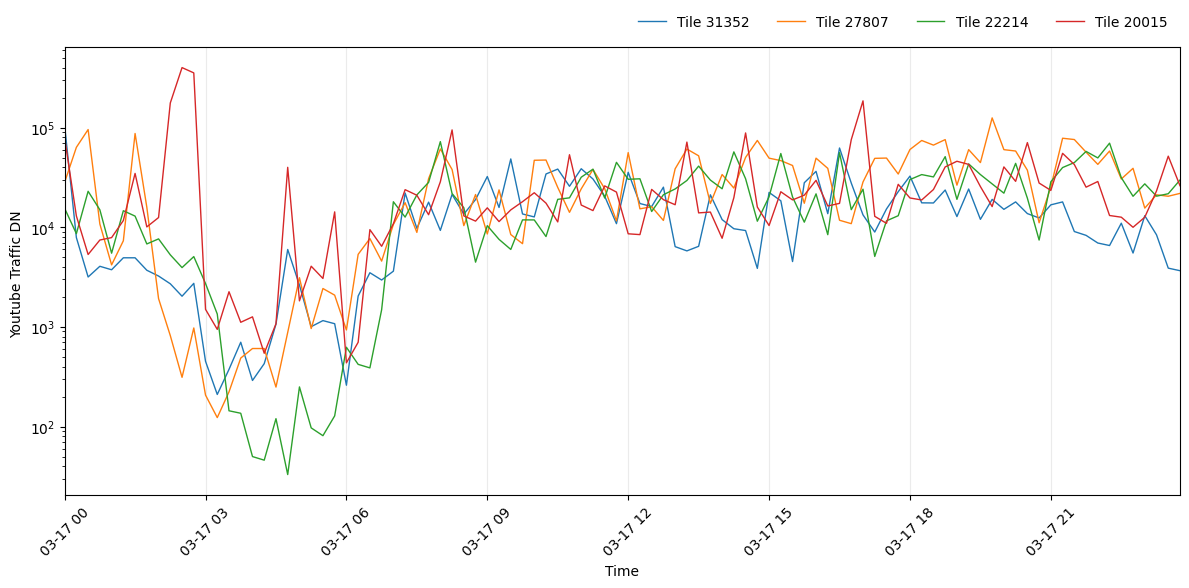

In [60]:
# Find all tile positions with any non-zero traffic
non_zero_tiles = np.argwhere(np.any(city_traffic > 0, axis=0))

# Pick a few random ones
np.random.seed(42)
random_indices = np.random.choice(len(non_zero_tiles), size=4, replace=False)
random_tiles = [tuple(non_zero_tiles[i]) for i in random_indices]

print("Selected non-zero tiles:", random_tiles)


plt.figure(figsize=(12, 6))

for random_tile in random_tiles:
    row, col = random_tile
    traffic_tile = city_traffic[:, row, col]
    
    if np.all(traffic_tile == 0):
        print(f"Tile ({row}, {col}) has all-zero traffic — skipping.")
        continue

    tile_id = row * n_cols + col
    plt.plot(times, traffic_tile, linewidth=1, label=f'Tile {tile_id}')

plt.xlabel('Time')
plt.ylabel(f'{app_str} Traffic DN ')
plt.xticks(rotation=45)
plt.grid(axis='x', alpha=0.25)
plt.xlim(times[0], times[-1])
plt.legend(loc='upper right',
            ncol=4,
            bbox_to_anchor=(1, 1.1), 
            fancybox=False, 
            frameon=False)
plt.yscale('log')
plt.tight_layout()
plt.show()


# Avoid tiles outside Marseille

In [61]:
# let's load the geojson file of the city
city_geojson_file = f'./dataset/{city_str}.geojson'
fd = open(city_geojson_file)
city_geojson = json.load(fd)
fd.close()

# showing one of the features
city_geojson['features'][0]

{'type': 'Feature',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[5.499717691410753, 43.196411174906586],
    [5.49976709216356, 43.19730893431691],
    [5.500994189929187, 43.19727278457212],
    [5.500944770050022, 43.19637502575483],
    [5.499717691410753, 43.196411174906586]]]},
 'properties': {'tile_id': 188}}

In [62]:
# we can use the tile_id to find the row and column index of the tile
# and most important only valid tiles are present in the geojson file
tile_id = city_geojson['features'][0]['properties']['tile_id']

row_index = int(tile_id // n_cols)
col_index = int(tile_id % n_cols)
print(f'row_index: {row_index}, col_index: {col_index}')

row_index: 0, col_index: 188


In [63]:
# let's create a mask of the city, where the value 1 indicates a valid tile and 0 an invalid tile
city_mask = np.zeros((n_rows, n_cols))

for feature in city_geojson['features']:
    tile_id = feature['properties']['tile_id']
    row_index = int(tile_id // n_cols)
    col_index = int(tile_id % n_cols)
    city_mask[row_index, col_index] = 1

# Plot the mask

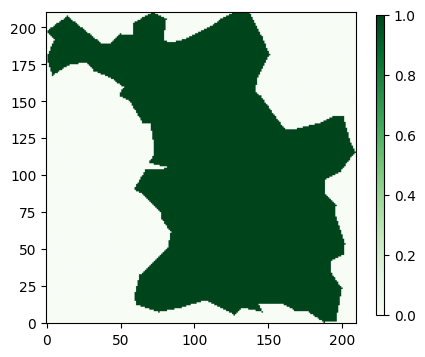

In [64]:
fig = plt.figure(figsize=(4, 6))
plt.imshow(city_mask, origin='lower', cmap='Greens')

cax = fig.add_axes([0.95, 0.25, 0.02, .5])
plt.colorbar(cax=cax)

plt.show()

# Mean and Median traffic

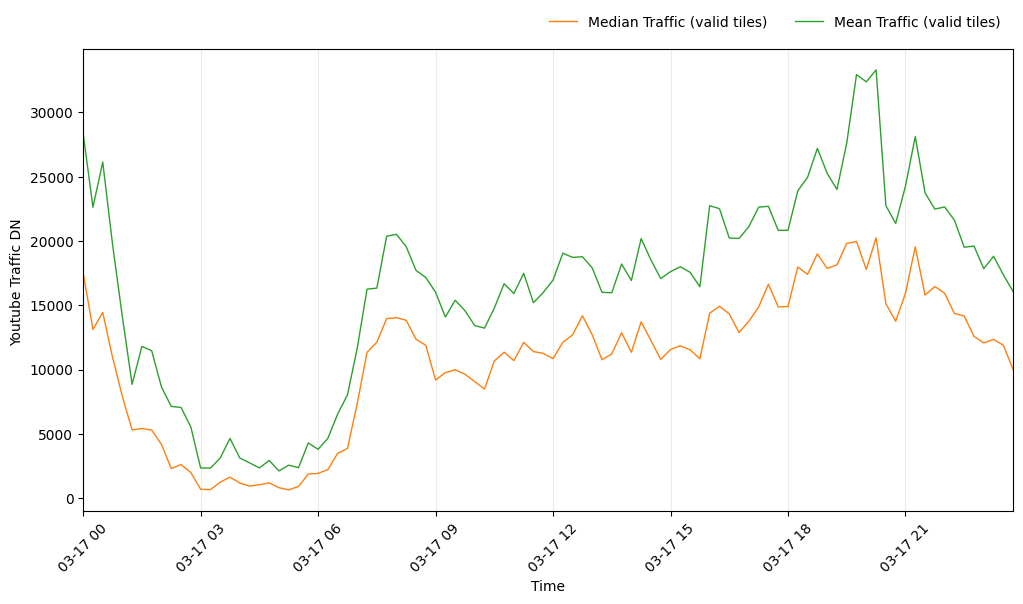

In [65]:
median_traffic = [np.median(city_traffic[time_index][city_mask == 1]) for time_index in range(len(times_str))]
mean_traffic = [np.mean(city_traffic[time_index][city_mask == 1]) for time_index in range(len(times_str))]

fig = plt.figure(figsize=(12, 6))
plt.plot(times, median_traffic, linewidth=1, color='tab:orange', label='Median Traffic (valid tiles)')
plt.plot(times, mean_traffic, linewidth=1, color='tab:green', label='Mean Traffic (valid tiles)')

plt.xlabel('Time')
plt.ylabel(f'{app_str} Traffic DN ')
plt.xticks(rotation=45)
plt.grid(axis='x', alpha=0.25)
plt.xlim(times[0], times[-1])
plt.legend(loc='upper right',
            ncol=3,
            bbox_to_anchor=(1, 1.1), 
            fancybox=False, 
            frameon=False)
plt.show()